In [49]:
import tensorflow as tf

Loading and viewing data

In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
X = np.array([0.,1.,2.,3.,4.,5.,6.,7.,8.,9.])
y = np.array([0.,2.,4.,6.,8.,10.,12.,14.,16.,18.])

In [52]:
X.shape, y.shape

((10,), (10,))

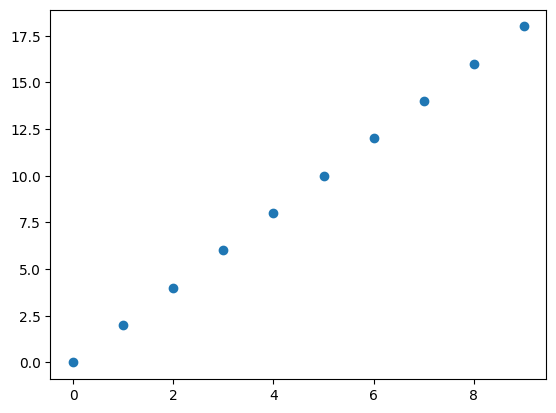

In [53]:
plt.scatter(X,y)

In [54]:
X,y

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]))

In [55]:
X = tf.constant(X)
y = tf.constant(y)


In [56]:
X[0].shape

TensorShape([])

***Building the model***
* `creating the model instance`
* `Compiling the model and optimization`
* `fiting the model`

In [57]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(1,)))

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["MAE"])

model.fit(X,y, epochs=5)

Epoch 1/5


c:\Users\Phavour\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - MAE: 11.0688 - loss: 11.0688
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step - MAE: 10.8591 - loss: 10.8591
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step - MAE: 10.6502 - loss: 10.6502
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - MAE: 10.4413 - loss: 10.4413
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - MAE: 10.2324 - loss: 10.2324


In [58]:
y_pred = model.predict(tf.constant([28.]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step


array([[-6.531649]], dtype=float32)

***Improving the model***
1. In the model creation :We can improve the model by 
    increasing the number og input data
    adding more hidden laysers
    consider changing the activation function  for each layer
2. In the model compilation: we can mprove the model by
    Change the actionation function  
    and perhaps the learning rate
3. During the model fitting: we can
    increase the number of epoches

In [59]:
# Lets rebuild our model
 
model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(1,)))
model.add(tf.keras.layers.Dense(10,input_shape=[1],activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.compile(
    loss = tf.keras.losses.mae,
    # optimizer = tf.keras.optimizers.SGD(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ['mae']
) 

model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 10.0830 - mae: 10.0830
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 9.9586 - mae: 9.9586
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - loss: 9.8364 - mae: 9.8364
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - loss: 9.7167 - mae: 9.7167
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 9.5992 - mae: 9.5992
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step - loss: 9.4846 - mae: 9.4846
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - loss: 9.3729 - mae: 9.3729
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 9.2659 - mae: 9.2659
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - loss: 9.1705 - mae: 9.1705
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - loss: 9.0777 - mae: 9.0777
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - loss: 8.9860 - mae: 8.9860
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - loss: 8.8962 - mae: 8.8962
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [60]:
model.predict(tf.constant([10]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


array([[19.103535]], dtype=float32)

**Improving the model by addin more datasets**

In [61]:
x = tf.range(-100, 100, 4)
y = x+10

x,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96])>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

In [62]:
x_train = x[:40]
y_train = y[:40]

x_test = x[40:]
y_test = y[40:]


x_train.shape, y_train.shape, x_test.shape, y_test.shape

(TensorShape([40]), TensorShape([40]), TensorShape([10]), TensorShape([10]))

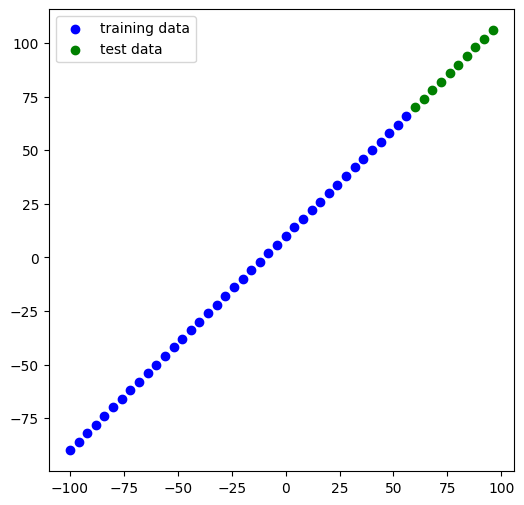

In [63]:
# visualising the data
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(x_train, y_train, c='blue', label ='training data')
plt.scatter(x_test, y_test,c='green', label ='test data')

plt.legend()
plt.show()

In [64]:
x[0],y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [65]:
# Building a new model with much more data
tf.random.set_seed(42)

model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(10, input_shape=[1]))
model_2.add(tf.keras.layers.Dense(1, name='output_layer'))

# compiling the model
model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ["mae"]
)


model_2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

***Total params*** - total number of parameters in our model
***Trainable params*** - These are the parameters(or patterns ) our model updatesas it trains
***Non-trainable params*** - these params aren't updated during training(Is typical when you bring in oter params from pre-trained model during ***'transfer learning'***) 

In [66]:
model_2.fit(x_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 37.7589 - mae: 37.7589
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30.7642 - mae: 30.7642  
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.8723 - mae: 23.8723 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.1964 - mae: 17.1964 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 10.9874 - mae: 10.9874
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.9860 - mae: 7.9860 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 10.3968 - mae: 10.3968 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.6274 - mae: 11.6274 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 11.9293 - mae: 11.9293 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 11.5181 - mae: 11.5181 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.5588 - mae: 10.5588  
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.1781 - mae: 9.1781 
Epoch 13/100
2/2 ━━━━━━

In [67]:
from tensorflow.keras.utils import plot_model

In [68]:
plot_model(model_2)

You must install pydot (`pip install pydot`) for `plot_model` to work.


visualizing the predictions

In [69]:
y_predict = model_2.predict(x_test)
y_predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


array([[ 69.753914],
       [ 73.74204 ],
       [ 77.73019 ],
       [ 81.718315],
       [ 85.70644 ],
       [ 89.69458 ],
       [ 93.6827  ],
       [ 97.67084 ],
       [101.65898 ],
       [105.6471  ]], dtype=float32)

In [70]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [71]:
def plot_predictions(
        train_data = x_train,
        train_labels = y_train,
        test_data  = x_test,
        test_labels = y_test,
        y_pred = y_predict
    ):
    plt.figure(figsize=(5,5))
    plt.scatter(train_data, train_labels,c='b', label='train_data')
    plt.scatter(test_data, test_labels, c='g', label='test_data')
    plt.scatter(test_data, y_pred, c='r', label='prediction')

    plt.legend()
    plt.show()



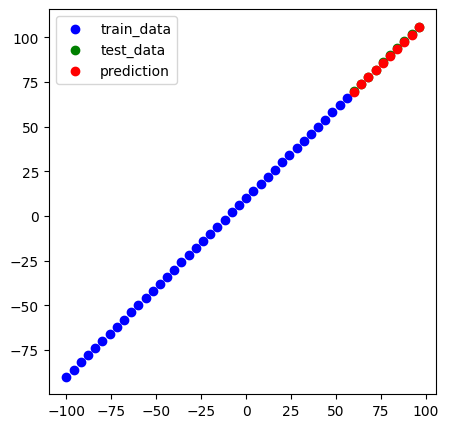

In [72]:
plot_predictions()

**Evaluation of model**
*1. mae(mean absolte error)*
*2. mse(mean squared error)*

In [73]:
model_2.evaluate(x_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - loss: 0.2995 - mae: 0.2995


[0.2994895875453949, 0.2994895875453949]

In [74]:
# tf.keras.losses.MeanAbsoluteError()(x_test,y_predict)
# mae = tf.metrics.mean_absolute_error

In [75]:
x_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96])>

In [76]:
tf.constant(y_predict)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 69.753914],
       [ 73.74204 ],
       [ 77.73019 ],
       [ 81.718315],
       [ 85.70644 ],
       [ 89.69458 ],
       [ 93.6827  ],
       [ 97.67084 ],
       [101.65898 ],
       [105.6471  ]], dtype=float32)>

In [77]:
tf.squeeze(y_predict)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.753914,  73.74204 ,  77.73019 ,  81.718315,  85.70644 ,
        89.69458 ,  93.6827  ,  97.67084 , 101.65898 , 105.6471  ],
      dtype=float32)>

In [78]:
tf.keras.losses.MAE(x_test,tf.squeeze(y_predict))

<tf.Tensor: shape=(), dtype=float32, numpy=9.70051>

In [79]:
# Find why this error
# tf.metrics.mean_absolute_error(y_test,tf.constant(y_predict))

In [80]:
tf.keras.losses.MSE(y_test,tf.squeeze(y_predict))

<tf.Tensor: shape=(), dtype=float32, numpy=0.09085598>

In [81]:
# find why this error
# tf.metrics.MeanSquaredError(y_test,tf.squeeze(y_predict))

In [82]:
# making a funtion to reuse the mae and the mse
def mae(y_true, y_pred):
    return tf.keras.losses.MAE(y_true, y_pred)
 
def mse(y_true, y_pred):
    return tf.keras.losses.MSE(y_true, y_pred)

In [83]:
mse(y_test,tf.squeeze(y_predict))

<tf.Tensor: shape=(), dtype=float32, numpy=0.09085598>

In [84]:
mae(y_test, tf.squeeze(y_predict))

<tf.Tensor: shape=(), dtype=float32, numpy=0.2994896>